# Programming for Data Analytics - Assignment 2 - weather

************************
*Task 02 of the assessment - Temperature over time* 
************************

            reportEndDateTime  dryBulbTemperature_Celsius
0   2024-10-02T16:15:00+00:00                   15.944444
1   2024-10-02T16:45:00+00:00                   15.777778
2   2024-10-02T17:00:00+00:00                   15.111111
3   2024-10-02T17:15:00+00:00                   14.277778
4   2024-10-02T17:30:00+00:00                   13.666667
..                        ...                         ...
84  2024-10-03T14:00:00+00:00                   14.611111
85  2024-10-03T14:15:00+00:00                   14.944444
86  2024-10-03T14:30:00+00:00                   14.944444
87  2024-10-03T14:45:00+00:00                   14.944444
88  2024-10-03T15:00:00+00:00                   14.722222

[89 rows x 2 columns]


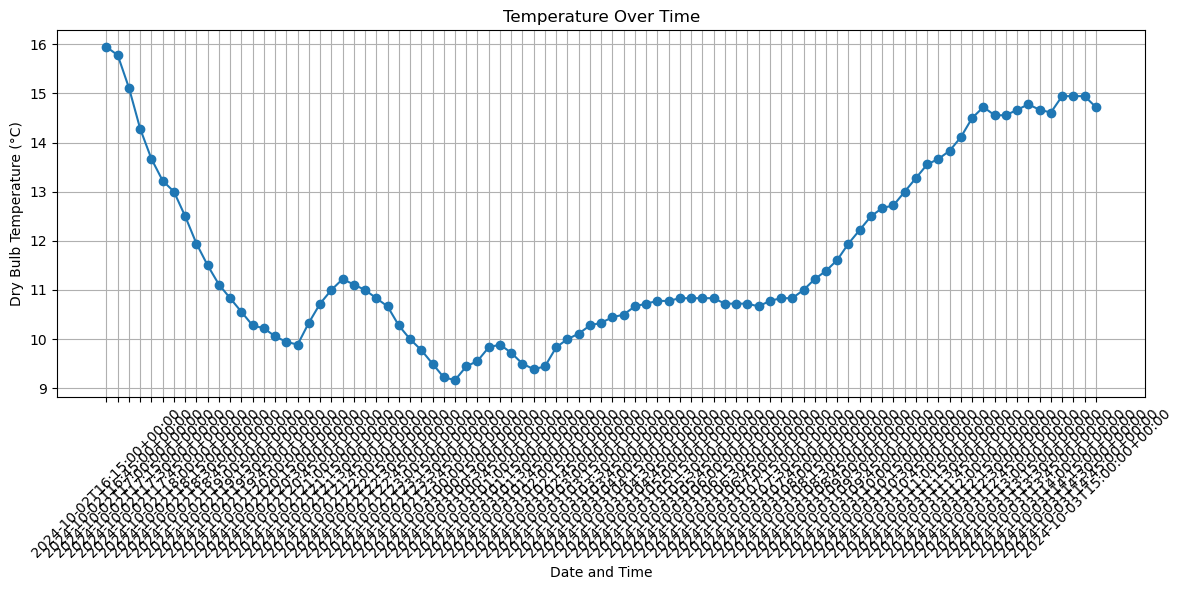

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mondbr/PFDA_assignments/refs/heads/main/data_files/weatherreadings1.csv")
print(df[['reportEndDateTime','dryBulbTemperature_Celsius']]) #double brackets to select muliple columns


plt.figure(figsize=(12, 6))
plt.plot(df['reportEndDateTime'], df['dryBulbTemperature_Celsius'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Dry Bulb Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

